# Scikit learn introduction
**Steps:**
0. An end-to-end Scikit-Learn workflow.
1. Getting the data ready.
2. Choose the right estimator / algorithm for our problems .
3. Fit the model / algorithm and use it to make predictions on our data.
4. Evaluating a model.
5. Improve the model.
6. Save and load the trained model.
7. Putting it all together!

In [264]:
steps = [
"0. An end-to-end Scikit-Learn workflow.",
"1. Getting the data ready.",
"2. Choose the right estimator / algorithm for our problems .",
"3. Fit the model / algorithm and use it to make predictions on our data.",
"4. Evaluating a model.",
"5. Improve the model.",
"6. Save and load the trained model.",
"7. Putting it all together!"
        ]

In [265]:
steps

['0. An end-to-end Scikit-Learn workflow.',
 '1. Getting the data ready.',
 '2. Choose the right estimator / algorithm for our problems .',
 '3. Fit the model / algorithm and use it to make predictions on our data.',
 '4. Evaluating a model.',
 '5. Improve the model.',
 '6. Save and load the trained model.',
 '7. Putting it all together!']

## 0. An end-to-end Scikit-learn workflow

In [266]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [267]:
# 1.Getting the data ready 
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [268]:
# Create x(feature matrix)
x = heart_disease.drop('target', axis=1)
# Create y(labels)
y = heart_disease['target']

In [269]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [270]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [271]:
# 2nd way to get rid of warnings
# import warnings
# warnings.filterwarnings('ignore')

In [272]:
# 2.Choose the right model hyper-parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # clf = classification model
# we'll keep the default hyper-parameters
clf.get_params() # to get the parameters of clf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [273]:
# 3.Fit the model to the training data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# for fix the warnings we can use 2 ways
# 1- n_estemators=100
# 2- import warnings
# warnings.filterwarnigs('ignore') or warning.filterwarnings('default') to get back

In [274]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [275]:
# Make a prediction
# y_label = clf.predict(np.array([1, 2, 3, 4])) ==> Error
# Shape of array doesn't fit

In [276]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [277]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [278]:
y_test.head()

297    0
143    1
232    0
213    0
47     1
Name: target, dtype: int64

In [279]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train), clf.score(x_test, y_test)

(1.0, 0.8032786885245902)

In [280]:
# See the accuracy more details
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [281]:
print(confusion_matrix(y_test, y_preds))

[[21  7]
 [ 5 28]]


In [282]:
print(accuracy_score(y_test, y_preds))

0.8032786885245902


In [283]:
# 5.Improve the model
# Try different amount of n_estimator
best_score = 0

for i in range(10, 100, 5):
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Trying model with {i} estimators ...")
    print(f"The model accuracy on the test set:{clf.score(x_test, y_test) * 100: .2f}%")
    
    if clf.score(x_test, y_test) > best_score:
        best_clf = clf
        best_score = clf.score(x_test, y_test)

print(f'The best score is ==> {best_score}')

Trying model with 10 estimators ...
The model accuracy on the test set: 75.41%
Trying model with 15 estimators ...
The model accuracy on the test set: 78.69%
Trying model with 20 estimators ...
The model accuracy on the test set: 75.41%
Trying model with 25 estimators ...
The model accuracy on the test set: 78.69%
Trying model with 30 estimators ...
The model accuracy on the test set: 77.05%
Trying model with 35 estimators ...
The model accuracy on the test set: 77.05%
Trying model with 40 estimators ...
The model accuracy on the test set: 80.33%
Trying model with 45 estimators ...
The model accuracy on the test set: 78.69%
Trying model with 50 estimators ...
The model accuracy on the test set: 81.97%
Trying model with 55 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 60 estimators ...
The model accuracy on the test set: 81.97%
Trying model with 65 estimators ...
The model accuracy on the test set: 80.33%
Trying model with 70 estimators ...
The model accura

In [284]:
best_clf.score(x_test, y_test)

0.8360655737704918

In [285]:
# 6. Save the model and reload it 
import pickle
pickle.dump(best_clf, open('Random_forest_model_1.pkl', 'wb'))


In [286]:
# Load it 
loaded_model = pickle.load(open('Random_forest_model_1.pkl', 'rb'))
loaded_model.score(x_test, y_test)

0.8360655737704918

In [287]:
# To see the version of sklearn
import sklearn
sklearn.show_versions()


System:
    python: 3.10.9 (main, Dec 19 2022, 17:35:49) [GCC 12.2.0]
executable: /home/mohammadali/learning/coding/git_projects/machine-learning/venv/bin/python
   machine: Linux-6.1.12-1-MANJARO-x86_64-with-glibc2.37

Python dependencies:
      sklearn: 1.2.2
          pip: 23.0.1
   setuptools: 65.5.1
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: Haswell
    num_threads: 8

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/mohammadali/learning/coding/git_projects/machine-learning/venv/li

In [288]:
steps[0] = '0. An end-to-end Scikit-Learn workflow [x]'

## 1. Getting the data ready

Three main things we have to do:

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [289]:
# split data for x and y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [290]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [291]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [292]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [293]:
# Show the shapes of our train data and test data 
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((242, 13), (61, 13), (61,), (242,))

In [294]:
# shape of all the data x = x_test + x_train
x.shape 

(303, 13)

### 1.1 Make sure all the data is numerical

In [295]:
# import the data
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [296]:
# see the type of our data and see the size of it
car_sales.dtypes, len(car_sales)

(Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object,
 1000)

In [297]:
# Split the data to x, y
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [298]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [299]:
y.tail()

995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, dtype: int64

In [300]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [301]:
x_train.shape, x_test.shape

((800, 4), (200, 4))

In [302]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)
# Error ==> can not convert string data to float

In [303]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                                remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [304]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [305]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [306]:
dumies = pd.get_dummies(car_sales[['Make','Colour', 'Doors']])
dumies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [307]:
# Refit the model 
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [308]:
model.score(x_test, y_test)

0.3362899219458084

### 1.2 What if there were missing values?
1. Fill them with some value(also known as imputation)
2. Remove the sample with missing data together.

In [309]:
# import car sales missing data
car_sales_missing_data = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing_data.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [310]:
# show how many data is missed
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [311]:
# Option 1: Fill missing data with pandas
# fill make
car_sales_missing_data['Make'].fillna('missing', inplace=True)
# fill the colour
car_sales_missing_data['Colour'].fillna('missing', inplace=True)
# fill the Odometer (KM)
car_sales_missing_data['Odometer (KM)'].fillna(car_sales_missing_data['Odometer (KM)'].mean(),
                                              inplace=True)
# fill the doors 
car_sales_missing_data['Doors'].fillna(4, inplace=True)

In [312]:
# remove the rows with missing values
car_sales_missing_data.dropna(inplace=True)

In [313]:
car_sales_missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [314]:
len(car_sales_missing_data)

950

In [315]:
x = car_sales_missing_data.drop('Price', axis=1)
y = car_sales_missing_data['Price']

In [316]:
# convert our data to the numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot' ,one_hot, categorical_features)],
                                remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing_data)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [317]:
# Option 2: Fill missing values with scikit-learn

In [318]:
missing_car_sales = pd.read_csv('car-sales-extended-missing-data.csv')
missing_car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [319]:
missing_car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [320]:
# drop the none value of price
missing_car_sales.dropna(subset=['Price'], inplace=True)
missing_car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [321]:
# split to x, y
x = missing_car_sales.drop('Price', axis=1)
y = missing_car_sales['Price']

In [322]:
# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [323]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing and numerical values with means
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_feature = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_feature),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

# Fill train and test values separately
filled_x_test = imputer.fit_transform(x_test) 
filled_x_train = imputer.fit_transform(x_train)

filled_x_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [324]:
# Get our transformed data array's back into DataFrame's
train_filled_car_sales = pd.DataFrame(filled_x_train,
                                     columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
test_filled_car_sales = pd.DataFrame(filled_x_test,
                                    columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

# Check missing data in training set
train_filled_car_sales.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [325]:
# Check to see the original... still missing values
missing_car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [326]:
# Convert all the data to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour' ,'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ('one_hot', one_hot, categorical_features)
], remainder='passthrough')

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(train_filled_car_sales)
transormed_x_test = transformer.fit_transform(test_filled_car_sales)

# Check transformed and filled x_train
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [327]:
# Fit the machine learning model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model.fit(transformed_x_train, y_train)
model.score(transormed_x_test, y_test)

0.25366332156443805

In [328]:
# check the length of fill data
transformed_x_train.shape[0] + transormed_x_test.shape[0], len(car_sales)

(950, 1000)

In [329]:
steps[1] = '1. Getting the data ready  [x]'

## 2. Choosing the right estimator/algorithm for our problem

##### Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number


### 2.1 Picking a machine learning model for regression problem

In [330]:
# import boston house data sets
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
boston

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [331]:
# convert dictionary to dataframe
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [332]:
# How many samples
len(boston_df)

20640

In [333]:
# Ridge regression model
from sklearn.linear_model import Ridge

# set up a random seed
np.random.seed(42)

# create the data 
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x, y)

# Check the score of ridge model on test data
model.score(x_test, y_test)

0.5833217438299315

How to improve this score?

What if ridge isn't working?!

Let's use the map again ...
![map](mahcine_learning_map.png)

In [334]:
# Try the random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# set up the random seed
np.random.seed(80)

# create the data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
# evaluate the score
model.score(x_test, y_test)

0.8113992988863026

### 2.2 Choosing as estimator for classification problem

In [335]:
# import the data 
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [336]:
# size of our data
len(heart_disease)

303

In [337]:
from sklearn.svm import LinearSVC

# set up the random seed
np.random.seed(80)

# make the data 
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use our model
model = LinearSVC(max_iter=76000, dual=False)
model.fit(x_train, y_train)

# evaluate the score
model.score(x_test, y_test)

0.8524590163934426

In [338]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [339]:
# use RandomForestClassification
from sklearn.ensemble import RandomForestClassifier

# set up the random seed
np.random.seed(80)

# make the data 
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model 
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8852459016393442

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning



In [340]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [341]:
steps[2] ='2. Choose the right estimator / algorithm for our problems [x]'

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

##### Different names for:
 * X = features, features variables, data
 * y = labels, targets, target variables


In [342]:
from sklearn.ensemble import RandomForestClassifier

# set up the random seed
np.random.seed(80)

# make the data 
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model 
model = RandomForestClassifier()

# fit our data to the model (training the machine learning model)
model.fit(x_train, y_train)

# Use the pattern the machine has learned
model.score(x_test, y_test)

0.8852459016393442

### 3.2 Make prediction using a machine learning model

##### 2 way to make predictions:
1. 'predict()'
2. 'predict_proba'

In [343]:
# make predictioin with predict()

In [344]:
# model.predict([1, 2, 3, 4 ,5])
# error wrong data shape

In [345]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3


In [346]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [347]:
np.array([y_test])

array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]])

In [348]:
# compare prediction to truth labels to evaluate the model
np.mean(y_pred == y_test)

0.8852459016393442

In [349]:
model.score(x_test, y_test)

0.8852459016393442

In [350]:
# or use metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8852459016393442

In [351]:
# make prediction with predict_proba() --> probabilities

In [352]:
model.predict_proba(x_test[:5])

array([[0.61, 0.39],
       [0.61, 0.39],
       [0.72, 0.28],
       [0.91, 0.09],
       [0.38, 0.62]])

In [353]:
# predict the same data
model.predict(x_test[:5])

array([0, 0, 0, 0, 1])

In [354]:
boston_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [355]:
from sklearn.ensemble import RandomForestRegressor

# set up the random seed
np.random.seed(80)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model
model = RandomForestRegressor()

# fit the data to the model
model.fit(x_train, y_train)

# make prediction
y_preds = model.predict(x_test)

# evaluate the score of our model
model.score(x_test, y_test)

0.8113992988863026

In [356]:
y_preds[:10]

array([1.72468  , 1.15655  , 2.80415  , 2.5863402, 1.64869  , 0.79288  ,
       2.00027  , 3.7782219, 0.87026  , 0.63219  ])

In [357]:
np.array(y_test[:10])

array([1.469, 0.892, 2.609, 2.688, 1.213, 0.634, 1.919, 3.375, 0.727,
       0.542])

In [358]:
# compare prediction to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

0.3217979357800389

In [359]:
steps[3] = '3. Fit the model / algorithm and use it to make predictions on our data [x]'

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:

    1. Estimator score method
    2. The scoring parameter
    3. Problem-specific metric functions.



### 4.1 Evaluating a model with the 'score method'

In [360]:
# classification

# import randomforest classification
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed(80)
np.random.seed(80)

# Create x, y in heart disease case
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split to test and train ==> test size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the data to the model 
model.fit(x_train, y_train)
# Option 1: check the score of our model
model.score(x_test, y_test)


0.8852459016393442

In [361]:
# Regression

# import randomforest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(80)

# create x, y in boston_df case
x = boston_df.drop("target", axis=1)
y = boston_df['target']

# split to test and train ==> test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Instantiate the model and fit the data to the model
model = RandomForestRegressor()
model.fit(x_train, y_train)
# Check the score of model
model.score(x_test, y_test)

0.8120853692560366

### 4.2 Evaluating a model using the 'scoring' parameter

In [362]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# classification

# import randomforest classification
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed(80)
np.random.seed(80)

# Create x, y in heart disease case
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split to test and train ==> test size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the data to the model 
model.fit(x_train, y_train)
# Option 1: check the score of our model
model.score(x_test, y_test)


0.8852459016393442

In [363]:
# use cross_val_score
cross_val_score(model, x, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.9       ,
       0.86666667, 0.7       , 0.86666667, 0.7       , 0.76666667])

In [364]:
# setup random seed()
np.random.seed(80)

# single training and test split
single_model_score = model.score(x_test, y_test)

# take the mean of 5-fold cross validation score
score_multi = np.mean(cross_val_score(model, x, y, cv=5))

# compare single and cross validation
single_model_score, score_multi

(0.8852459016393442, 0.8149180327868851)

In [365]:
# in this case we use cross_val_score because the model trained through all the data and
# data splits to N part and train through these N part 



#### 4.2.1 Classification model evaluation metrics

   1. Accuracy
   2. Area under ROC curve
   3. Confusion matrix
   4. Classification report


**accuracy**

In [366]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed 
np.random.seed(80)

# create x, y ==> heart disease
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# instantiate the model 
model = RandomForestClassifier()

# use cross_val_score
cross_val = cross_val_score(model, x, y, cv=5)


In [367]:
# print the accuracy of our model 
print(f'The heart disease Classifier Cross validated accuracy is : {np.mean(cross_val) *100:.2f}%')

The heart disease Classifier Cross validated accuracy is : 81.49%


**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under the curve(AUC) 
* ROC curve

ROC curve is a comparison of a model's true positive rate(tpr) versus a model false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [368]:
# import roc_curve
from sklearn.metrics import roc_curve

# train, test and split
x_train, x_test, y_train, y_test = train_test_split(x, y)

# fit the data to the model
model.fit(x_train, y_train)

# make predictions with probabilities
y_probs = model.predict_proba(x_test)

# show some of y_probs
y_probs[:10]

array([[0.69, 0.31],
       [0.44, 0.56],
       [0.95, 0.05],
       [0.54, 0.46],
       [0.56, 0.44],
       [0.59, 0.41],
       [0.49, 0.51],
       [0.64, 0.36],
       [0.85, 0.15],
       [0.46, 0.54]])

In [369]:
# slice the list of 1 probability
positive_y_probs = y_probs[:, 1]
positive_y_probs, len(positive_y_probs)

(array([0.31, 0.56, 0.05, 0.46, 0.44, 0.41, 0.51, 0.36, 0.15, 0.54, 0.92,
        0.98, 0.82, 0.06, 0.51, 0.66, 0.09, 0.03, 0.34, 0.76, 0.74, 0.22,
        0.52, 0.15, 0.92, 0.54, 0.53, 0.01, 0.72, 0.31, 0.66, 0.02, 0.64,
        0.87, 0.3 , 1.  , 0.79, 0.55, 0.94, 0.23, 0.41, 0.51, 0.81, 0.81,
        0.95, 0.99, 0.22, 0.07, 0.41, 0.51, 0.7 , 0.99, 0.8 , 0.4 , 0.57,
        0.04, 0.15, 0.89, 0.49, 0.07, 0.07, 0.71, 0.77, 0.83, 0.79, 0.25,
        0.83, 0.03, 0.68, 1.  , 0.91, 0.97, 0.66, 0.2 , 0.86, 0.75]),
 76)

In [370]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, positive_y_probs)
thresholds

array([2.  , 1.  , 0.99, 0.94, 0.92, 0.86, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.77, 0.76, 0.74, 0.72, 0.68, 0.66, 0.57, 0.55, 0.54, 0.53, 0.52,
       0.51, 0.44, 0.41, 0.36, 0.34, 0.31, 0.3 , 0.23, 0.22, 0.2 , 0.15,
       0.09, 0.07, 0.04, 0.03, 0.01])

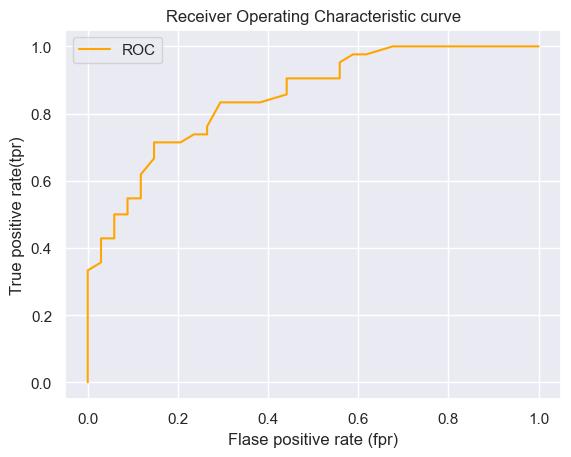

In [371]:
import matplotlib.pyplot as plt
# create function for ROC curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # customize the plot 
    plt.xlabel('Flase positive rate (fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [372]:
from sklearn.metrics import roc_auc_score
# non perfect roc_curve 
area = roc_auc_score(y_test, positive_y_probs)
area

0.8494397759103641

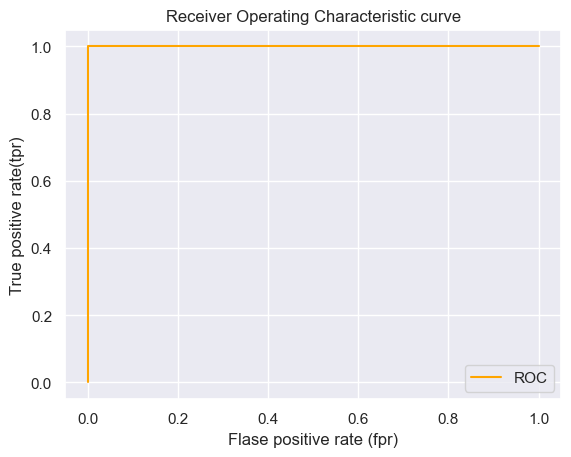

1.0

In [373]:
# perfect roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

area = roc_auc_score(y_test, y_test)
area

**Confusion Matrix**

A confusion matrix is a quick way to compare a model predicts and the actual label it was supposed to predict.
in essence, giving you an idea of where the model is getting confused. 

In [374]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# use predicts for x_test
y_preds = model.predict(x_test)

# use confusion matrix
confusion_matrix(y_test, y_preds)

array([[24, 10],
       [ 7, 35]])

In [375]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['actual label'], colnames=['predicted label'])

predicted label,0,1
actual label,,
0,24,10
1,7,35


<Axes: >

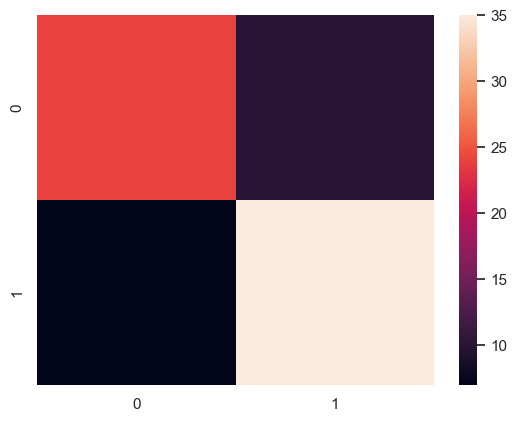

In [376]:
# Make our confusion matrix more visualize with seaborn's heatmap()
import seaborn as sns

# set the font scale of seaborn
sns.set(font_scale=1)

# create a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_preds)

# plotting using seaborn
sns.heatmap(conf_matrix)

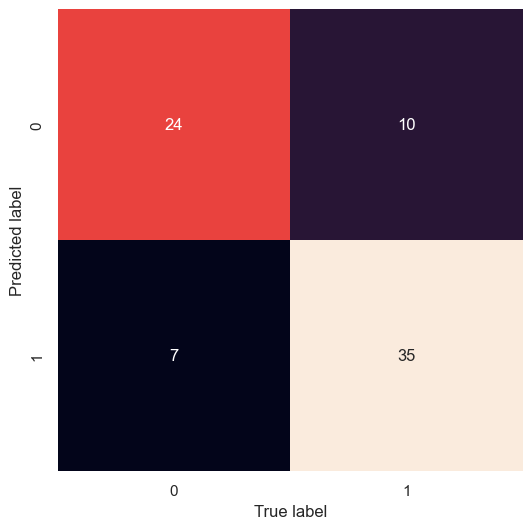

In [377]:
def plot_conf_matrix(conf_matrix):
    """
    Plots a confusion matrix using seaborn.heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    # annot = annotate the heatmap with conf_matrix info
    ax = sns.heatmap(conf_matrix, annot=True, cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_matrix(conf_matrix)

In [378]:
# from sklearn.metrics import _plot
# _plot.confusion_matrix(model, x_test, y_test, values_format="d")

**Classification Report**

In [379]:
# import classification report
from sklearn.metrics import classification_report

# print the result of classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        34
           1       0.78      0.83      0.80        42

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



* The recall means "how many of this class you find over the whole number of element of this class"

* The precision will be "how many are correctly classified among that class"

* The f1-score is the harmonic mean between precision & recall

* The support is the number of occurrence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well-balanced dataset.)


In [380]:
disease_true = np.zeros(10000)
disease_true[0] = 1
disease_true

array([1., 0., 0., ..., 0., 0., 0.])

In [381]:
disease_preds = np.zeros(10000) # model predict every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True, zero_division=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,1.0,0.9999,0.999950,0.99990
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**To summarize classification metrics:**

   * Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
   * Precision and recall become more important when classes are imbalanced.
   * If false positive predictions are worse than false negatives, aim for higher precision.
   * If false negative predictions are worse than false positives, aim for higher recall.
   * F1-score is a combination of precision and recall.



#### 4.2.2 Regression model evaluation metrics 

   1. R^2 (pronounced r-squared) or coefficient of determination.
   2. Mean absolute error (MAE)
   3. Mean squared error (MSE)

- R^2

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [382]:
from sklearn.ensemble import RandomForestRegressor

# set up the random seed
np.random.seed(80)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model
model = RandomForestRegressor()

# fit the data to the model
model.fit(x_train, y_train)

# make prediction
y_preds = model.predict(x_test)

# evaluate the score of our model
model.score(x_test, y_test)

0.8113992988863026

In [383]:
# import r2_score 
from sklearn.metrics import r2_score
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.07069402, 2.07069402, 2.07069402, ..., 2.07069402, 2.07069402,
       2.07069402])

In [384]:
# use r2_score 
r2_score(y_test, y_test_mean)

0.0

In [385]:
# use r2_score for perfect model
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.


In [386]:
# import mean absolute error
from sklearn.metrics import mean_absolute_error

# make some predictions
y_preds = model.predict(x_test)

# use mean absolute error
mae = mean_absolute_error(y_test, y_preds)
mae
# prediction_values +- mae = actual_values

0.3217979357800389

In [387]:
# create a dataframe to see it visually
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df

,actual values,predicted values
6263,1.469,1.724680
7533,0.892,1.156550
14553,2.609,2.804150
10787,2.688,2.586340
9941,1.213,1.648690
...,...,...
3228,0.534,0.780340
10115,2.450,2.928010
20418,3.929,3.503171
15301,1.854,1.764110


In [388]:
# add differences column in df
df['differences'] = df['actual values'] - df['predicted values']
df

,actual values,predicted values,differences
6263,1.469,1.724680,-0.255680
7533,0.892,1.156550,-0.264550
14553,2.609,2.804150,-0.195150
10787,2.688,2.586340,0.101660
9941,1.213,1.648690,-0.435690
...,...,...,...
3228,0.534,0.780340,-0.246340
10115,2.450,2.928010,-0.478010
20418,3.929,3.503171,0.425829
15301,1.854,1.764110,0.089890


In [389]:
df['differences'].mean()

0.001580369307170909

**Mean squared error (MSE)**


In [390]:
# import mean squared error
from sklearn.metrics import mean_squared_error

# use mean squared error 
mse = mean_squared_error(y_test, y_preds)
mse

0.2425995190648615

In [391]:
# calculate mse by hands
np.square(df['differences']).mean()

0.2425995190648615

#### 4.2.3 Finally using the scoring parameter

In [392]:
# import cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# setup random seed 
np.random.seed(80)

# setup x, y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Instantiate the model 
model = RandomForestClassifier()

# use cross validation score 
acc_cross = cross_val_score(model, x, y, cv=5)
acc_cross

array([0.85245902, 0.86885246, 0.80327869, 0.8       , 0.75      ])

In [393]:
# mean of cross validation score
np.mean(acc_cross)

0.8149180327868851

In [394]:
np.random.seed(80)
acc_cross = cross_val_score(model, x, y, cv=5, scoring='accuracy')
np.mean(acc_cross)

0.8149180327868851

In [395]:
# precision
np.random.seed(80)
precision = cross_val_score(model, x, y,cv=5, scoring='precision')
np.mean(precision)

0.8225497762000309

In [396]:
# recall
np.random.seed(80)
recall = cross_val_score(model, x, y,cv=5, scoring='recall')
np.mean(recall)

0.8484848484848486

In [397]:
# f1
np.random.seed(80)
f1 = cross_val_score(model, x, y,cv=5, scoring='f1')
np.mean(f1)

0.8335307298335467

How about our regression model?

In [398]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(80)

# create x, y
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# instantiate the model
model = RandomForestRegressor()

# use cross_val_score
acc_cross = cross_val_score(model, x, y, cv=5, scoring=None)
np.mean(acc_cross)

0.6477453198101781

In [399]:
# setup random seed
np.random.seed(80)

# use cross_val_score
r2_cross = cross_val_score(model, x, y, cv=5, scoring='r2')
r2_cross

array([0.50052642, 0.70392816, 0.73875874, 0.61831124, 0.67720204])

In [400]:
# setup random seed
np.random.seed(80)

# mean absolute error
cv_mae = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-0.54955183, -0.40791685, -0.44030023, -0.46597902, -0.47616019])

In [401]:
# setup random seed
np.random.seed(80)

# mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([-0.53657061, -0.34657077, -0.37580355, -0.4477913 , -0.4703678 ])

In [402]:
np.mean(cv_mse)

-0.43542080814255935

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [403]:
# import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(80)

# create x, y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# train, test and split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model 
model = RandomForestClassifier()

# fit the model
model.fit(x_train, y_train)

# Make some predictions 
y_preds = model.predict(x_test)

# evaluate the classifier
print(f'accuracy score: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'precision score:{precision_score(y_test, y_preds)}')
print(f'recall score:{recall_score(y_test, y_preds)}')
print(f'f1 score:{f1_score(y_test, y_preds)}')

accuracy score: 88.52%
precision score:0.9487179487179487
recall score:0.8809523809523809
f1 score:0.9135802469135802


**Regression evaluation functions**

In [404]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(80)

# create x, y 
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# train , test and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model 
model = RandomForestRegressor()

# fit the data to the model
model.fit(x_train, y_train)

# Make some predictions
y_preds = model.predict(x_test)

# Evaluate the regression model
print(f'R^2 : {r2_score(y_test, y_preds)}')
print(f'mean absolute error: {mean_absolute_error(y_test, y_preds)}')
print(f'mean squared error: {mean_squared_error(y_test, y_preds)}')

R^2 : 0.8113992988863026
mean absolute error: 0.3217979357800389
mean squared error: 0.2425995190648615


In [405]:
steps[4] = '4. Evaluating a model [x]'

# 5. Improving a model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

   * Could we collect more data? (generally, the more data, the better)
   * Could we improve our data?

From a model perspective:

   * Is there a better model we could use?
   * Could we improve the current model?

Hyper-parameters vs. Parameters

   * Parameters = model find these patterns in data
   * Hyper-parameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyper-parameters:

   1. By hand
   2. Randomly with RandomSearchCV
   3. Exhaustively with GridSearchCV


In [406]:
# import randomforestclassifier 
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model 
model = RandomForestClassifier()

# get hyperparameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning hyper-parameters by hand

##### make 3 set ==> training, test, validation
**try and adjust:**
* max_depth
* max_features
* min_samples_leaf
* min_sample_split
* n_estimators


In [407]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true label versus y_preds label on classification
    model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2), 'precision': round(precision, 2)
                   , 'recall': round(recall, 2), 'f1': round(f1, 2)}
   
    return metric_dict

In [408]:
# show the data 
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [409]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(80)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split to x, y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split to train, test, validation
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
train_split, valid_split

(212, 257)

In [410]:
# split data to train, valid, test
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split: valid_split], y[train_split: valid_split]
x_test, y_test = x[valid_split:], y[valid_split]

# length of data sets
len (x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [411]:
# Instantiate the model 
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [412]:
# train the model 
model.fit(x_train, y_train)

# make baseline predictions
y_preds = model.predict(x_valid)

# evaluate the classifier on validation set
class_metrics = evaluate_preds(y_valid, y_preds)
class_metrics

{'accuracy': 0.73, 'precision': 0.78, 'recall': 0.72, 'f1': 0.75}

In [413]:
# create a second classifier with different hyperparameter
model_2 = RandomForestClassifier(n_estimators=1000)

# fit the data to the model
model_2.fit(x_train, y_train)

# make predictions
y_preds_2 = model_2.predict(x_valid)

# evaluate the 2nd classifier on validation set
class_metrics_2 = evaluate_preds(y_valid, y_preds_2)
class_metrics_2

{'accuracy': 0.73, 'precision': 0.78, 'recall': 0.72, 'f1': 0.75}

In [414]:
# model 3
model_3 = RandomForestClassifier(max_depth=10)

# fit the data to the model
model_3.fit(x_train, y_train)

# make some predictions
y_preds_3 = model_3.predict(x_valid)

# evaluate the 3rd model
class_metrics_3 = evaluate_preds(y_valid, y_preds_3)
class_metrics_3

{'accuracy': 0.76, 'precision': 0.79, 'recall': 0.76, 'f1': 0.78}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [415]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}


# setup random seed
np.random.seed(80)

# split to x, y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split to train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV         n_inters ==> number of try
rs_model = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=10
                             ,cv=5, verbose=2)

# fit the randomized search cv on the model
rs_model.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, m

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.9s


In [416]:
# best result
rs_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5}

In [417]:
# make predictions with the best hyperparameters
rs_y_preds = rs_model.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

rs_metrics

{'accuracy': 0.84, 'precision': 0.77, 'recall': 0.93, 'f1': 0.84}

### 5.3 Hyperparameter tunning with GridSearchCV

In [418]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# GridSearchCV is like bruteforce
# create grid_2
grid_2 = {"n_estimators": [10, 100, 200, 1000],
        "max_depth": [None, 4, 10],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [5]}

# setup random seed
np.random.seed(80)

# split to x, y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split to train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV         n_inters ==> number of try
grid_search_model = GridSearchCV(estimator=model, param_grid=grid_2
                             ,cv=5, verbose=2)
# fit the data
grid_search_model.fit(x_train, y_train);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depreca

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depreca

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depreca

[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.9s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depreca

[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.9s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.9s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depreca

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depreca

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   2.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   2.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, mi

In [419]:
grid_search_model.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 100}

In [420]:
# make some predictions
grid_search_y_preds = grid_search_model.predict(x_test)
# evaluate the score
gs_metric = evaluate_preds(y_test, grid_search_y_preds)
gs_metric

{'accuracy': 0.84, 'precision': 0.77, 'recall': 0.93, 'f1': 0.84}

In [421]:
# compare the models
compare_metrics = pd.DataFrame({'baseline': class_metrics,
                                'class-metric 2':class_metrics_2,
                               'class metric 3':class_metrics_3,
                               'RandomSearchCV': rs_metrics,
                               'GridSearchCV': gs_metric})
compare_metrics

,baseline,class-metric 2,class metric 3,RandomSearchCV,GridSearchCV
accuracy,0.73,0.73,0.76,0.84,0.84
precision,0.78,0.78,0.79,0.77,0.77
recall,0.72,0.72,0.76,0.93,0.93
f1,0.75,0.75,0.78,0.84,0.84


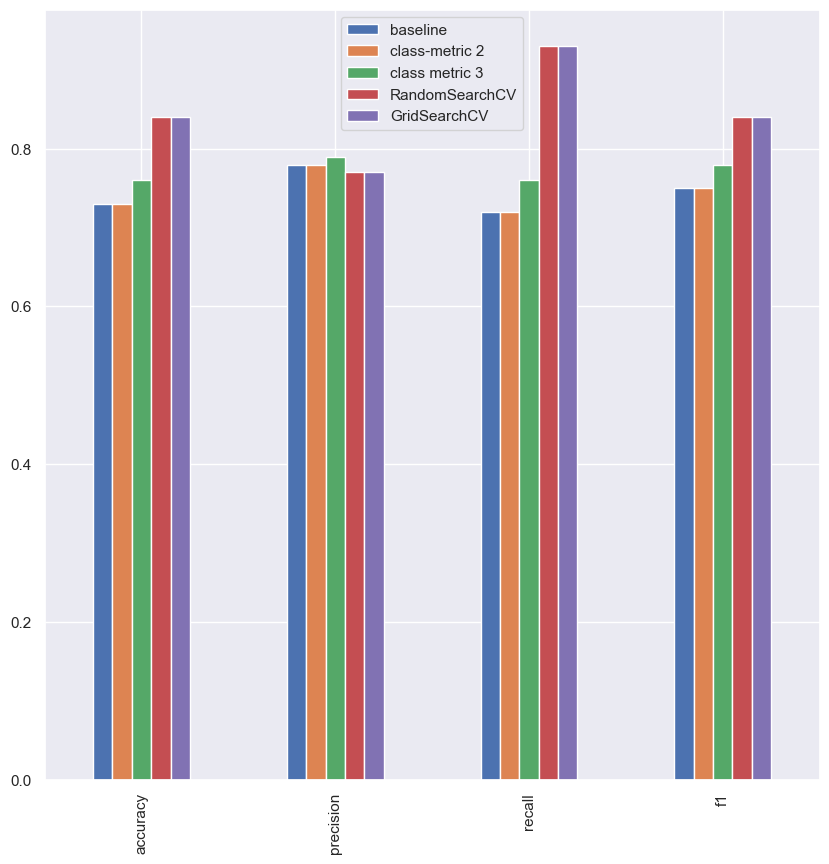

In [422]:
# plot the comparison
compare_metrics.plot.bar(figsize=(10, 10));

In [423]:
steps[5] = '5. Improve the model [x]'

## 6. Saving and loading trained machine learning models 

Two ways to save and load machine learning models:

   1. With Python's pickle module
   2. With the joblib module


**pickle**

In [424]:
# import pickle
import pickle

# save the existing model to a file
pickle.dump(grid_search_model, open('grid_search_model_1.pkl', 'wb'))

In [425]:
# load the save model
loaded_grid_model = pickle.load(open('grid_search_model_1.pkl', 'rb'))

In [426]:
y_preds_loaded_grid = loaded_grid_model.predict(x_test)

evaluate_preds(y_test, y_preds_loaded_grid)

{'accuracy': 0.84, 'precision': 0.77, 'recall': 0.93, 'f1': 0.84}

**joblib**

In [427]:
# import joblib
import joblib
joblib.dump(grid_search_model, filename='grid_search_model_2.joblib')

['grid_search_model_2.joblib']

In [428]:
# load the save model
loaded_grid_joblib = joblib.load(filename='grid_search_model_2.joblib')

In [429]:
y_preds_loaded_grid_joblib = loaded_grid_joblib.predict(x_test)

evaluate_preds(y_test, y_preds_loaded_grid_joblib)

{'accuracy': 0.84, 'precision': 0.77, 'recall': 0.93, 'f1': 0.84}

In [430]:
steps[6] = '6. Save and load the trained model [x]'

## 7. Putting it all together!

In [431]:
# read the data
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [432]:
# check the None fields
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [433]:
data.dtypes, data.shape

(Make              object
 Colour            object
 Odometer (KM)    float64
 Doors            float64
 Price            float64
 dtype: object,
 (1000, 5))

Steps we want to do (all in one cell):
   1. Fill missing data
   2. Convert data to numbers
   3. Build a model on the data

In [434]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np

# set random seed
np.random.seed(80)

# import data and drop the rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformers pipline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
     ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_features),
    ('door', door_transformer, door_features),
    ('numeric', numeric_transformer, numeric_features)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data to x, y
x = data.drop('Price', axis=1)
y = data['Price']

# split to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the data to the model 
model.fit(x_train, y_train)

# score of the model 
model.score(x_test, y_test)

0.13787894615670537

In [435]:
# Use GridSearchCV with our regression Pipeline

from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__numeric__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [10, 100, 1000],
    "model__max_depth": [None, 5, 4],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]    
}
# use GridSearchCV
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
# fit the data to the model
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.1s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   3.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   3.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   3.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   3.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.9s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, prepro

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.3s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   2.7s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, prepro

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__i

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__nume

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.7s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.9s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__i

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.8s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.5s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__i

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=10, preprocessor__numeric__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__nume

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.6s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.5s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.4s


/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=4, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.4s
[CV] END model__max_depth=4, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=4, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__numeric__i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5, 4],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [10, 100, 1000],
                         'preprocessor__numeric__imputer__strategy': ['mean',
                                                                      'median']},
             verbose=2)

In [436]:
# score of our model
gs_model.score(x_test, y_test)

0.20597081195701472

In [437]:
# save the model
import pickle
pickle.dump(gs_model, open('car_sales_regression_model.pkl', 'wb'))

In [438]:
steps[7] = '7. Putting it all together! [x]'

In [439]:
steps

['0. An end-to-end Scikit-Learn workflow [x]',
 '1. Getting the data ready  [x]',
 '2. Choose the right estimator / algorithm for our problems [x]',
 '3. Fit the model / algorithm and use it to make predictions on our data [x]',
 '4. Evaluating a model [x]',
 '5. Improve the model [x]',
 '6. Save and load the trained model [x]',
 '7. Putting it all together! [x]']